In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Preparation
random_seed = 231
X, y = make_blobs(n_samples=300, n_features=4, centers=3, random_state=random_seed)

In [3]:
# Function to compute K-means and silhouette scores
def kmeans_silhouette_scores(X, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f"When k = {k}: silhouette score is {score}")
        
    return silhouette_scores

# Range of K values to evaluate
k_range = range(2, 6)
silhouette_scores = kmeans_silhouette_scores(X, k_range)

# Determine the best K
best_k = k_range[np.argmax(silhouette_scores)]
print(f"The best K based on silhouette score is: {best_k}")

When k = 2: silhouette score is 0.6515279371492652
When k = 3: silhouette score is 0.838307214726647
When k = 4: silhouette score is 0.6243095614369332
When k = 5: silhouette score is 0.42444835947679366
The best K based on silhouette score is: 3


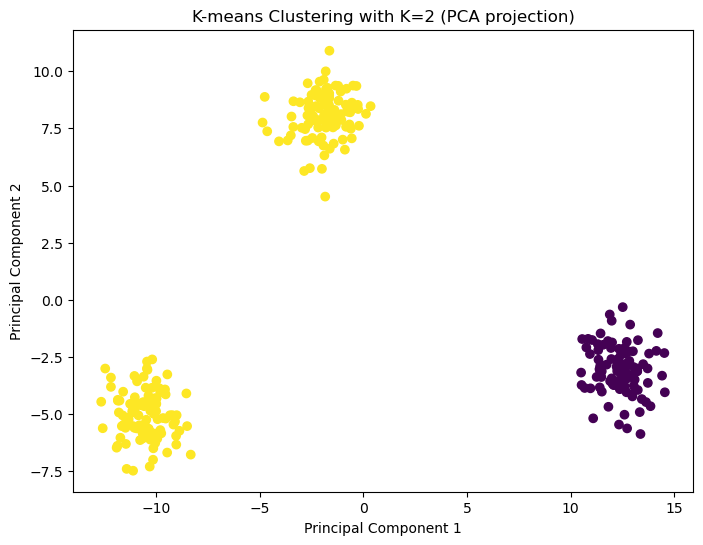

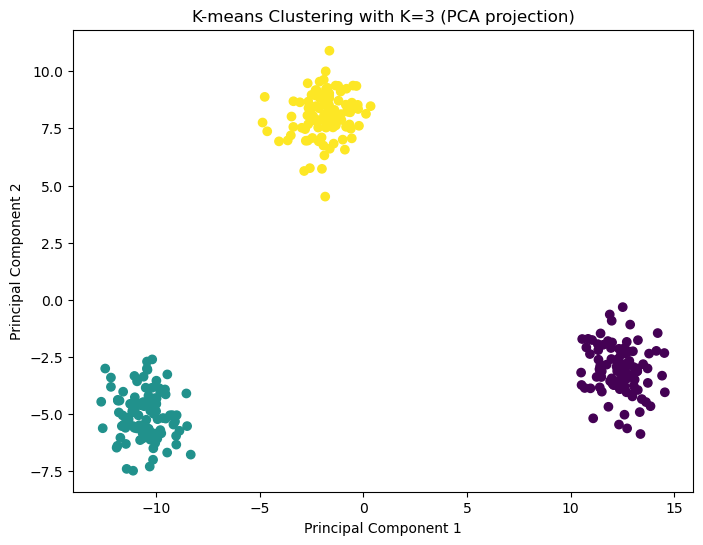

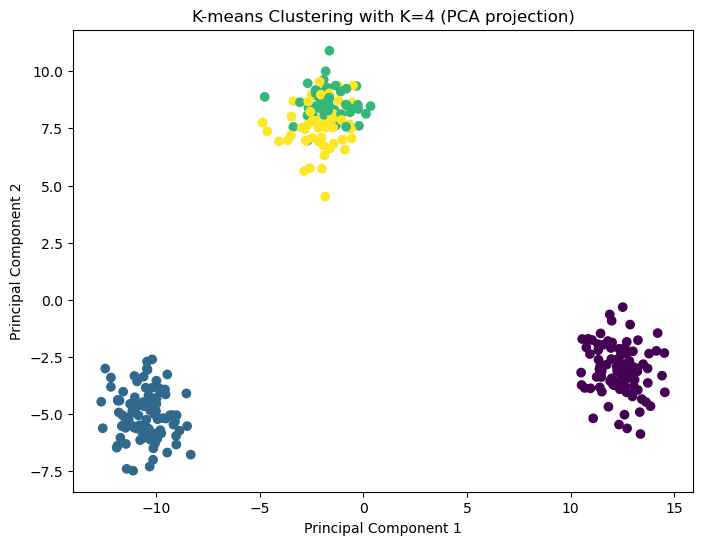

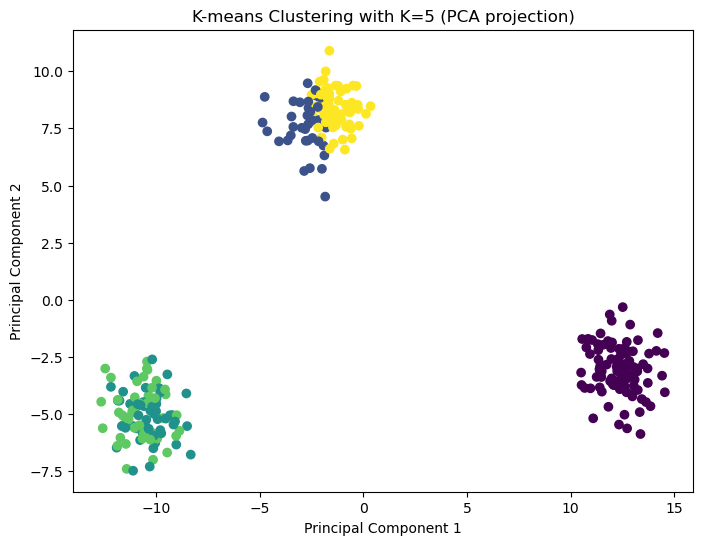

In [4]:
# Implementing K-means with the best K
for i in range (2,6):
    best_kmeans = KMeans(n_clusters=i, random_state=random_seed)
    best_kmeans.fit(X)
    labels = best_kmeans.labels_

    # Applying PCA to reduce dimensionality
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualize the clusters in PCA-transformed space
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'K-means Clustering with K={i} (PCA projection)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')



    plt.show()

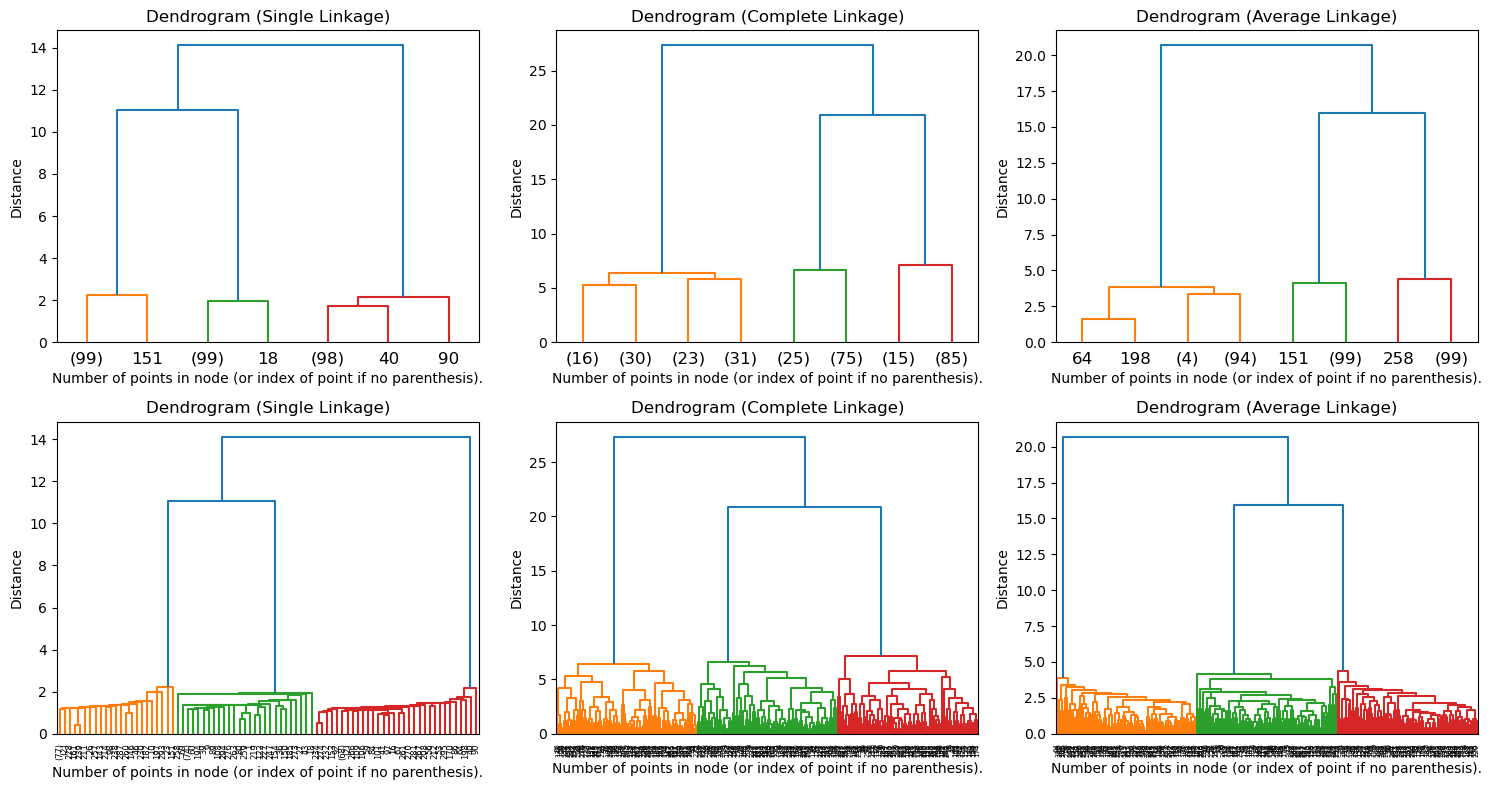

In [7]:
# Generate sample data
n_samples = 300
n_features = 4
n_clusters = 3
np.random.seed(231)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Linkage methods
linkage_methods = ['single', 'complete', 'average']

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 8))

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    agg_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    agg_clusters.fit(X)
    
    # Plot dendrogram
    plt.subplot(2, 3, i + 1)
    plot_dendrogram(agg_clusters, truncate_mode="level", p=2)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    
    # Plot dendrogram
    plt.subplot(2, 3, i + 4)
    plot_dendrogram(agg_clusters, truncate_mode="level", p=20)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    
plt.tight_layout()
plt.show()
